# Import Libraries 

In [1]:
import os
import sys  # Read system parameters.

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

import keras  # Provide a frontend for TensorFlow.
import matplotlib as mpl  # Create 2D charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import sklearn  # Perform data mining and analysis.
import tensorflow  # Train neural networks for deep learning.
from keras import datasets
from keras.layers import LSTM, Dense, Embedding, LeakyReLU
from keras.models import Sequential
from keras.utils import plot_model
from keras_preprocessing import sequence
from numpy.random import seed
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

"""Summarize the software libraries used."""
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- scikit-learn {}".format(sklearn.__version__))
print("- TensorFlow {}".format(tensorflow.__version__))
print("- Keras {}\n".format(keras.__version__))

Libraries used in this project:
- Python 3.10.13 (main, Sep 11 2023, 08:21:04) [Clang 14.0.6 ]
- NumPy 1.26.4
- Matplotlib 3.9.2
- scikit-learn 1.5.1
- TensorFlow 2.10.0
- Keras 2.10.0



# Load the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=10000)
print("Loaded {} training records.".format(len(X_train.data)))
print("Loaded {} test records.".format(len(X_test.data)))

Loaded 25000 training records.
Loaded 25000 test records.


**Spotlights**

- This is the complete IMDb movie review dataset consisting of 25000 review records.
- This is a Keras version that has been preprocessed, using a different method than previously applied.
- Instead of loading the entire dataset, the num_words parameter restricts it to the 10,000 most frequently used words, with any words outside this range represented by a special character.

# Explore the Data

In [3]:
"""Examine the last example's features."""

print("Features for the last example :\n")
print(X_train[-1])
print("\n")
print("Label: {}".format(y_train[-1]))

Features for the last example :

[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 2, 270, 2, 5, 2, 2, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 2, 21, 27, 9685, 6139, 5, 2, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 2, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 2, 2, 544, 5, 383, 1271, 848, 1468, 2, 497, 2, 8, 1597, 8778, 2, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]


Label: 0


**Spotlights** 

- This output highlights the characteristics derived from the last movie review.
- Each characteristic corresponds to a word in the review, listed in order of appearance.
- The numerical value assigned to each characteristic indicates the word's frequency rank within the dataset, with common words receiving lower numbers and rare words getting higher ones. The label for this example is 0, indicating a negative sentiment in a binary classification scenario, where 1 would denote a positive sentiment.

### Interpret the encoded data accurately to transform sequence values into meaningful text.

- The first and second lines will convert each numerical feature into its corresponding word by using a predefined dictionary for the dataset.
- In line six, any unfamiliar word will be substituted with a question mark (?).
- This process ensures that all numerical values are accurately represented in a more understandable format.

In [4]:
index = datasets.imdb.get_word_index()
index_dictionary = dict([(value, key) for (key, value) in index.items()])

"""To enhance clarity, substitute any unfamiliar terms with '?'."""
decoded = " ".join([index_dictionary.get(i - 3, "?") for i in X_train[-1]])

### Analyze the Output

In [5]:
print("\n", decoded)


 ? as a big fan of the original film it's hard to watch this show the ? set ? and ? ? sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter ? but his snappy wardrobe and ? apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha ? is a really bad choice the english accent and california looks can't hold a candle to barbara ? ? voice and sex appeal lee j ? tries ? to fashion barton ? but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is


**Spotlights** 

Upon reading the text, it is evident why it received a negative label.

- By examining the words alongside their numerical rankings, it becomes clear that the order is logical. For instance, the word "this" ranks 14, showing it is quite frequent, while "rob" ranks 2098, suggesting it is much rarer.
- The review's text is presented in a simplified manner, lacking punctuation and capital letters, which makes it easier for the neural network to analyze.
- Further text processing could involve eliminating stop words or extracting lemmas, but this level of analysis is adequate for the moment.


# Examine Some Summary Statistics

In [6]:
result = [len(i) for i in X_train]
print("Mean review length (in words): {:.0f}".format(np.mean(result)))
print("Standard deviation (in words): {:.0f}".format(np.std(result)))

Mean review length (in words): 239
Standard deviation (in words): 176


**Spotlights** 

- Reviews typically average about 239 words in length.
- The standard deviation is approximately 176 words.

### Plot the Average Review Length

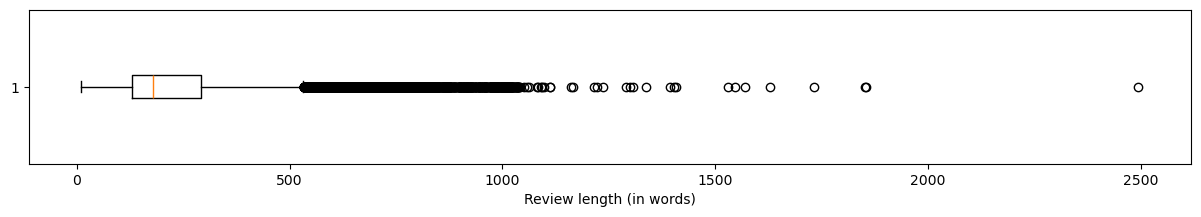

In [7]:
plt.figure(figsize=(15, 2))
plt.boxplot(result, vert=False)
plt.xlabel("Review length (in words)")
plt.show()

**Spotlights**

The box plot supports the mean and standard deviation values, indicating that most reviews fall below 500 words, which will serve as a helpful benchmark for processing the reviews.

# Pad the Data

In [8]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

print("Number of features: {}".format(X_train.shape[1]))

Number of features: 500


**Spotlights** 

This serves to verify that each data example contains a total of 500 features. To put it another way, every review consists of 500 words, whether they are familiar or unfamiliar.

# Partition the Dataset 

Separate the training and validation datasets along with their corresponding labels. 

To create a validation holdout, the original training dataset will be divide. The initial test set loaded at the beginning will serve as the final test case.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

print(f"Shape of the training features:         {X_train.shape}")
print(f"Shape of the validation features:       {X_val.shape}")
print(f"Training labels:           {y_train.shape}")
print(f"Shape of the validation labels:         {y_val.shape}")

Shape of the training features:         (18750, 500)
Shape of the validation features:       (6250, 500)
Training labels:           (18750,)
Shape of the validation labels:         (6250,)


# Create the RNN Architecture

This code establishes the framework for the RNN using Keras.

**NOTE** on Embedding: Embedding refers to the technique of transforming a word into a unique vector that exists in a multi-dimensional space. These vectors come together to form a comprehensive embedded space for the network. Words that share similar meanings are positioned nearer to each other in this space, enhancing the model's capacity to identify patterns. This approach effectively reduces the complexity of language inputs, which would otherwise necessitate an extensive number of features for every word in a vocabulary. 

In [10]:
"""Create the model as a series of layers."""

rnn = Sequential()

"""Begin by adding layers sequentially, one at a time."""
rnn.add(
    Embedding(  # Creates an embedded input layer
        input_dim=10000,  # Define the size of the input vocabulary (top 10,000 words).
        output_dim=100,  # Size of the embedding vector that the model will develop
        input_length=500,  # The total length of the input corresponds to the # of words in a review
    )
)
"""Incorporate a long short-term memory (LSTM) cell as the subsequent layer."""
rnn.add(LSTM(units=64))  # 64-dimensional LSTM.

"""Introduce a leaky ReLU layer to serve as the activation function"""
rnn.add(LeakyReLU(alpha=0.1))

rnn.add(Dense(128, activation="linear"))
rnn.add(LeakyReLU(alpha=0.1))

"""Introduces a single output layer employing the sigmoid activation function for binary classification."""
rnn.add(Dense(1, activation="sigmoid"))  # Dense output layer with sigmoid activation.
print("The RNN structure has been built.")

The RNN structure has been built.


## Set up the Model

The compile() method is used to prepare the Keras RNN object created in the earlier code block for the training process. Just like with the CNN developed previously, the 'adam' optimizer will be utilized and the focus will be o on obtaining the model's accuracy score. For the loss function, opt for 'binary_crossentropy', which is akin to 'categorical_crossentropy' but is specifically designed for binary classification tasks.

In [11]:
rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Review the Model's Layers

This gives a summary of the architecture of the RNN. Similar to the CNN, each layer is detailed, including its output dimensions and the total number of parameters.

In [12]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,050,689
Trainable params: 1,050,689
Non-

### Re-Imagine the Model's Layers

The accompanying code will create a more visual representation of the various layers within the RNN, making it easier to understand their configurations and relationships

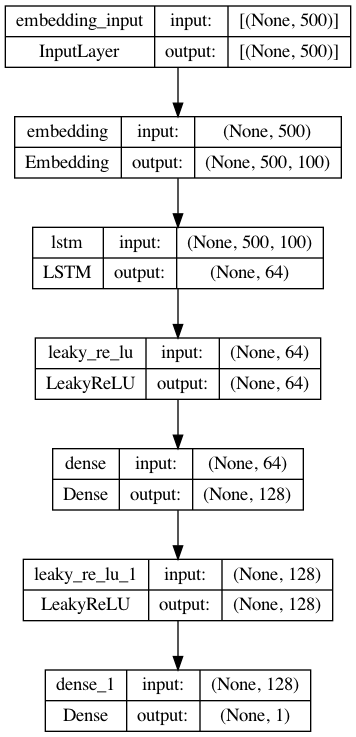

In [13]:
plot_model(rnn, show_shapes=True, to_file="model2.png")

## Train the Model Using the Training Data.

The next step uses the training dataset in conjunction with the validation set to fit the RNN model. Keras offers a method to monitor the training process in real-time. Observe how the training loss diminishes as time goes on, while the accuracy steadily improves. Training the model for several epochs instead of just one is likely to enhance both its loss score and accuracy.

In [14]:
trained_rnn_model = rnn.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=5, verbose=1
)

Epoch 1/5
586/586 [==============================] - 159s 267ms/step - loss: 0.4423 - accuracy: 0.7912 - val_loss: 0.3284 - val_accuracy: 0.8683
Epoch 2/5
586/586 [==============================] - 152s 260ms/step - loss: 0.2426 - accuracy: 0.9045 - val_loss: 0.3178 - val_accuracy: 0.8757
Epoch 3/5
586/586 [==============================] - 154s 262ms/step - loss: 0.2091 - accuracy: 0.9184 - val_loss: 0.3844 - val_accuracy: 0.8622
Epoch 4/5
586/586 [==============================] - 154s 262ms/step - loss: 0.1271 - accuracy: 0.9536 - val_loss: 0.4202 - val_accuracy: 0.8589
Epoch 5/5
586/586 [==============================] - 151s 259ms/step - loss: 0.1462 - accuracy: 0.9455 - val_loss: 0.4432 - val_accuracy: 0.8579


### Assess the Model's Performance on the Test Data.

This stage involves utilizing a labeled test set to evaluate how well the model performs during the final fitting phase. Ideally, the outcomes from the test set should closely match those derived from the validation set.

In [15]:
test_data_eval = rnn.evaluate(X_test, y_test, verbose=0)

### Examine Model Scores

In [17]:
print("Loss: {}".format(round(test_data_eval[0], 2)))
print("Accuracy: {:.0f}%".format(test_data_eval[1] * 100))

Loss: 0.45
Accuracy: 86%


**Spotlights** 

The model achieved a performance rate of 86% on the test set, which matches its performance on the validation set above(val_accuracy).

## Generate Predictions Based on the Test Data

In [18]:
"""Only predict the initial 100 examples."""

prediction = rnn.predict(X_test[:100])

"""To simplify the probabilities, round them off to either 0 or 1."""
prediction = np.round(np.ndarray.flatten(prediction))  #
prediction = prediction.astype(int)

print("Actual class:    {}".format(y_test[:10]))
print("Predicted class: {}".format(prediction[:10]))

4/4 [==============================] - 1s 61ms/step
Actual class:    [0 1 1 0 1 1 1 0 0 1]
Predicted class: [0 1 1 1 1 1 1 0 1 1]


**Spotlights** 

The forecasts correspond closely with the true class labels for the majority of the reviews.

## Examine Reviews

### Correctly Classified Review

In [20]:
review_labels = ["negative", "positive"]

number_of_examples = 100

for index in range(number_of_examples):
    if y_test[index] == prediction[index]:
        print("Actual review sentiment:    {}".format(review_labels[y_test[index]]))
        print(
            "Predicted review sentiment: {}\n".format(review_labels[prediction[index]])
        )

        decoded = " ".join([index_dictionary.get(x - 3, "?") for x in X_test[index]])

        print(decoded)

        break

Actual review sentiment:    negative
Predicted review sentiment: negative

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the c

**Spotlights** 

The model accurately identified this review as negative.

- A closer look at the review supports this, as the user clearly expressed their dislike for the movie.
- Since the review is under 500 words, it starts with some unclear word values (question marks) for padding.

### Incorrectly Classified Review

In [21]:
for index in range(number_of_examples):
    if y_test[index] != prediction[index]:
        print("Actual review sentiment:    {}".format(review_labels[y_test[index]]))
        print(
            "Predicted review sentiment: {}\n".format(review_labels[prediction[index]])
        )

        decoded = " ".join([index_dictionary.get(x - 3, "?") for x in X_test[index]])

        print(decoded)

        break

Actual review sentiment:    negative
Predicted review sentiment: positive

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown

**Spotlights** 

The model mistakenly classified this review as positive, even though it actually conveys a negative sentiment.

- Upon examining the review, it's clear that the tone is negative, but there might be clues that led the model to interpret it as positive.
- Similar to previous instances, this review has been extended to reach a length of 500 words.